In [65]:
from warnings import filterwarnings
filterwarnings('ignore')

In [66]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
path  = r"/workspaces/Iris-Streamlit-deployment-/notebook/iris.csv"

In [68]:
df  =  pd.read_csv(path)

# Basic Checks

In [69]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [71]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [72]:
df.index

RangeIndex(start=0, stop=150, step=1)

# Basic Quality checks

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [74]:
df.duplicated().sum()

np.int64(1)

In [75]:
# drop duplicate

df.drop_duplicates(keep="first" , ignore_index= True , inplace= True)

In [76]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# split x &y

In [77]:
x  =  df.drop('species' , axis  =1)
y  =  df['species']

In [78]:
a= y.value_counts()
a

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

<Axes: xlabel='species'>

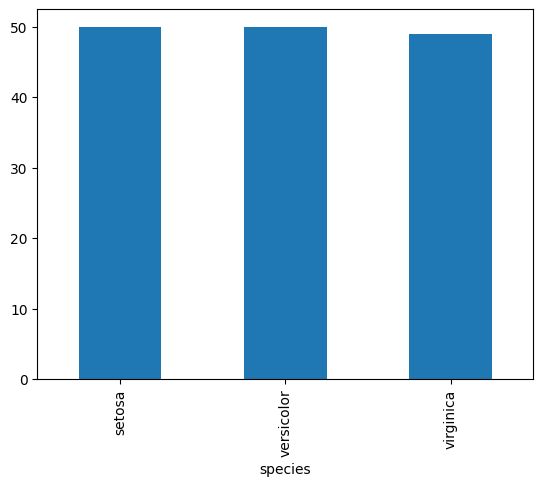

In [79]:
a.plot(kind  = 'bar')

# train test split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train ,   x_test , y_train , y_test =   train_test_split(x,y, test_size  = 0.33 ,  random_state= 23)

In [82]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
129,7.2,3.0,5.8,1.6
147,6.2,3.4,5.4,2.3
33,5.5,4.2,1.4,0.2
133,6.3,2.8,5.1,1.5
84,5.4,3.0,4.5,1.5


In [83]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
138,6.0,3.0,4.8,1.8
125,7.2,3.2,6.0,1.8
67,5.8,2.7,4.1,1.0
3,4.6,3.1,1.5,0.2
113,5.7,2.5,5.0,2.0


In [84]:
y_train.head()

129     virginica
147     virginica
33         setosa
133     virginica
84     versicolor
Name: species, dtype: object

In [85]:
y_test.head()

138     virginica
125     virginica
67     versicolor
3          setosa
113     virginica
Name: species, dtype: object

In [86]:
print(x_train.shape  , y_train.shape)
print(x_test.shape  , y_test.shape)

(99, 4) (99,)
(50, 4) (50,)


# Create pipeline

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model import LogisticRegression


In [88]:
model  =  Pipeline(steps  = [("imputer" , SimpleImputer(strategy= "median" ) ) ,  ("Scaler" , StandardScaler()) ,
("model" ,  LogisticRegression())])

In [89]:
model.fit(x_train  , y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Scaler', StandardScaler()), ('model', LogisticRegression())])

In [90]:
model.score(x_train  , y_train)

0.9696969696969697

In [91]:
model.score(x_test  , y_test)

0.96

# confusion matrix display

In [92]:
from sklearn.metrics  import ConfusionMatrixDisplay , classification_report


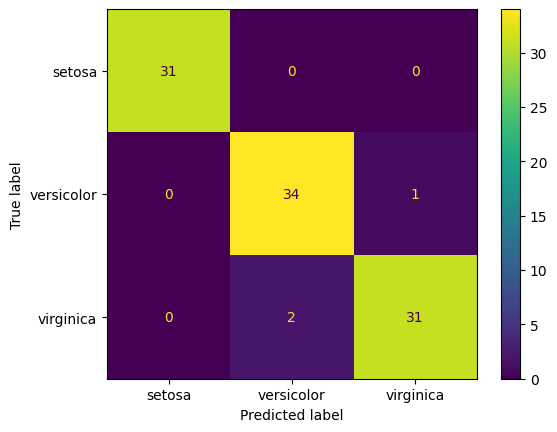

In [93]:
ConfusionMatrixDisplay.from_estimator(model , x_train  , y_train)

# clasification report 


In [94]:
y_test_pred  =  model.predict(x_test)

In [95]:
y_test_pred

array(['virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica', 'setosa',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor'], dtype=object)

In [96]:
print(classification_report(y_test  , y_test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.88      0.93        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



# for overfitting check  use cv

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
cv  = cross_val_score(model  ,  x_train , y_train , cv  =  5 , scoring= "f1_macro")

In [99]:
cv.mean()

np.float64(0.9619047619047618)

In [100]:
import joblib

In [102]:
joblib.dump(model ,  "iris_model.joblib")

['iris_model.joblib']

In [103]:
m  =  joblib.load("iris_model.joblib")

In [104]:
m.score(x_train , y_train)

0.9696969696969697